In [3]:
import os
import xarray as xr

os.chdir("/home/nma/HDD/archives/regional2sims/wall_wind/")
import numpy as np


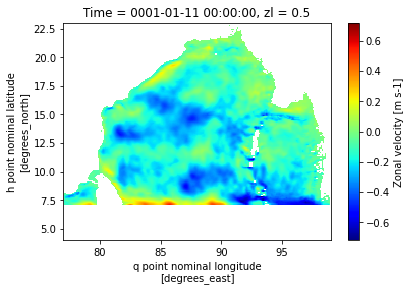

In [64]:
dd = xr.open_mfdataset("ocns*")

dd.u[-1,0,:,:].plot(cmap='jet')



In [24]:
import plotly.graph_objects as go
import numpy as np
import xarray as xr
import os

ocns = xr.open_mfdataset("ocns*.nc",use_cftime=True)


lons,lats,zz = ocns.xq[:-1],ocns.yq[:-1],ocns.zl
lon2d, lat2d = np.meshgrid(lons, lats)

salin1 = ocns.salt.isel(zl=0,Time=0).values

salin2 = ocns.salt.isel(zl=1,Time=0).values

salin3 = ocns.salt.isel(zl=2,Time=0).values

salin4 = ocns.salt.isel(zl=3,Time=0).values

salin5 = ocns.salt.isel(zl=4,Time=0).values

#salin6 = ocns.sst.isel(zl=5,Time=0).values

#salin1 = ocns.sst.isel(Time=0).values

#salin2 = ocns.sst.isel(Time=0).values

#salin3 = ocns.sst.isel(Time=0).values

z_new = ocns.zl.values[:6]

zz1 = np.ones(shape=np.shape(salin1))*(-1*(z_new[0]))
zz2 = np.ones(shape=np.shape(salin1))*(-1*(z_new[1]))
zz3 = np.ones(shape=np.shape(salin1))*(-1*(z_new[2]))
zz4 = np.ones(shape=np.shape(salin1))*(-1*(z_new[3]))
zz5 = np.ones(shape=np.shape(salin1))*(-1*(z_new[4]))
zz6 = np.ones(shape=np.shape(salin1))*(-1*(z_new[5]))

#%%
max_v = np.nanmax(salin1)
min_v = np.nanmin(salin1)


contour1 = go.Contour(x= lons,y = lats,z = salin1)

               
fig = go.Figure(data=[
    go.Surface(x=lons,y=lats,z=zz1,surfacecolor=salin1,hovertext=salin1,name="Level 1",colorscale="Earth"),
    go.Surface(x=lons,y=lats, z=zz2,surfacecolor=salin2,hovertext=salin2,name="Level 2" ,colorscale="Earth"),

],layout=go.Layout(
        title=go.layout.Title(text="Salinity 2D vertical profile (6 levels)")
    ))
#fig = go.Figure(data=[go.Surface(x=lons,y=lats,z=zz1,surfacecolor=salin1,
                                 #hovertext=salin1,name="Level 1",colorscale="thermal")],layout=go.Layout(title=go.layout.Title(text="SST 2D vertical profile (6 levels)")))

fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="green"
)

fig.write_html("outtest.html")
max_v
lons

<xarray.DataArray 'xq' (xq: 262)>
array([77.      , 77.083969, 77.167939, ..., 98.748092, 98.832061, 98.916031])
Coordinates:
  * xq       (xq) float64 77.0 77.08 77.17 77.25 ... 98.66 98.75 98.83 98.92
Attributes:
    long_name:       q point nominal longitude
    units:           degrees_east
    cartesian_axis:  X

In [45]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=2)

sst1 = ocns.sst.isel(Time=0).values

fig.append_trace(go.Contour(x=lons,y=lats,
        z=salin1 ,
        contours=dict(
            coloring ='fill',
            showlabels = True, # show labels on contours
            labelfont = dict( # label font properties
                size = 12,
                color = 'white',
            )
        ),
            hovertext = salin1,),row=1, col=1)



fig.write_html("cont_test.html")


In [51]:
import plotly.graph_objects as go
import numpy as np

# Create figure
fig = go.Figure()

# Add traces, one for each slider step
for step in np.arange(10):
    salin1 = ocns.salt.isel(zl=0,Time=step)
    fig.add_trace(
        go.Contour(x=lons,y=lats,
        z=salin1 ,
        contours=dict(
            coloring ='heatmap',
            showlabels = True, # show labels on contours
            labelfont = dict( # label font properties
                size = 12,
                color = 'white',
            )
        ),
            hovertext = salin1,))

# Make 10th trace visible
fig.data[0].visible = True

# Create and add slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Slider switched to timestep : " + str(i)}],  # layout attribute
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=10,
    currentvalue={"prefix": "Time: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    autosize=False,
    width=1000,
    height=1000
)

fig.write_html("cont_test.html")